# AI Project - Wine Quality Classifier

## Import libraries

In [ ]:
# Imports
from google.colab import drive

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Connect to Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and describe dataset

In [ ]:
wine_df = pd.read_csv("/content/drive/MyDrive/AI Project/winequalityN.csv")
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
wine_df.isna().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [ ]:
wine_df[0:18]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


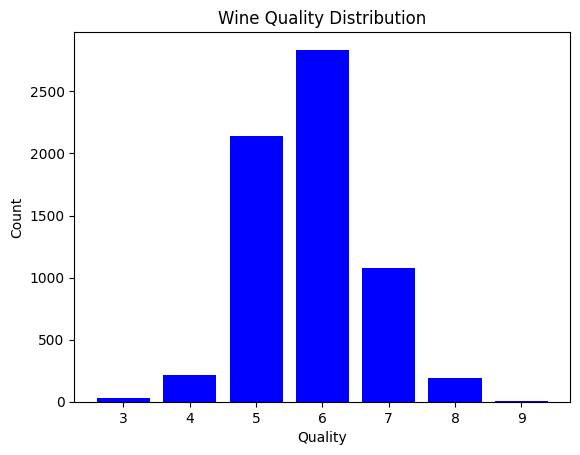

In [ ]:
quality_counts = wine_df['quality'].value_counts().sort_index()

# Plot a bar chart
plt.bar(quality_counts.index, quality_counts.values, color='blue')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')
plt.show()

## Data pre-processing

In [ ]:
# Impute missing values
columns_to_fill = wine_df.columns.difference(['type'])
wine_df[columns_to_fill] = wine_df[columns_to_fill].fillna(wine_df[columns_to_fill].mean())

# Binarize the target into 1 and 0
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

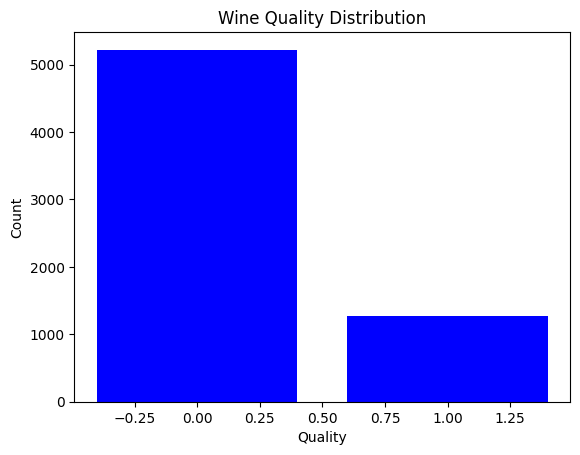

In [ ]:
quality_counts = wine_df['quality'].value_counts().sort_index()

# Plot a bar chart
plt.bar(quality_counts.index, quality_counts.values, color='blue')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')
plt.show()

## Split into red and white wine

In [ ]:
wine_white = wine_df.query('type == \'white\'')
wine_red = wine_df.query('type == \'red\'')
wine_white = wine_white.drop('type', axis=1)
wine_red = wine_red.drop('type', axis=1)

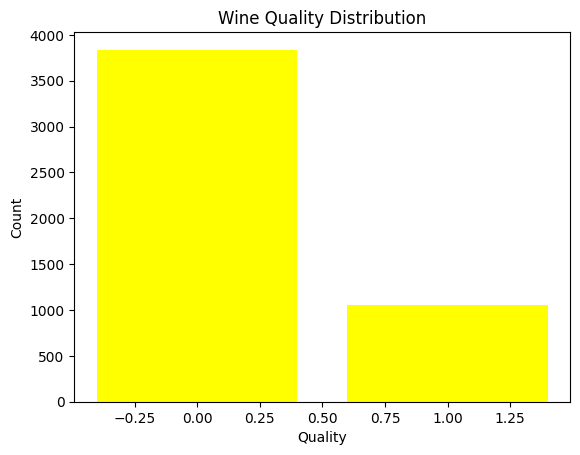

In [ ]:
quality_counts = wine_white['quality'].value_counts().sort_index()

# Plot a bar chart
plt.bar(quality_counts.index, quality_counts.values, color='yellow')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')
plt.show()

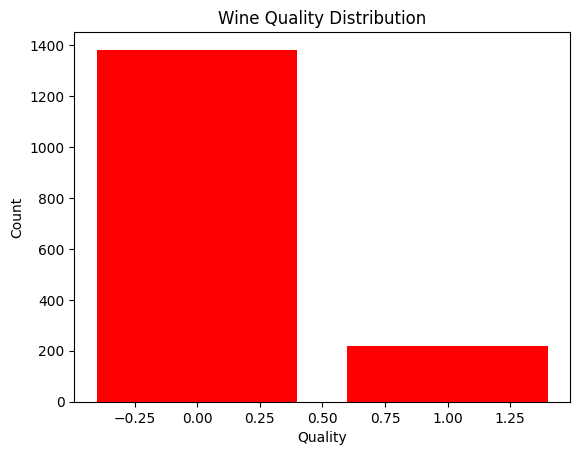

In [ ]:
quality_counts = wine_red['quality'].value_counts().sort_index()

# Plot a bar chart
plt.bar(quality_counts.index, quality_counts.values, color='red')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')
plt.show()

# import seaborn as sns
# sns.pairplot(wine_white, hue='quality')

# White wine

## k-Nearest-Neighbors

### Train-test splitting

In [ ]:
wine_white_copy = pd.DataFrame(wine_white)
wine_white_copy.drop_duplicates(inplace=True)

# Divide features from target
X = wine_white_copy.drop('quality', axis=1)
y = wine_white_copy['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

Best k value = 27


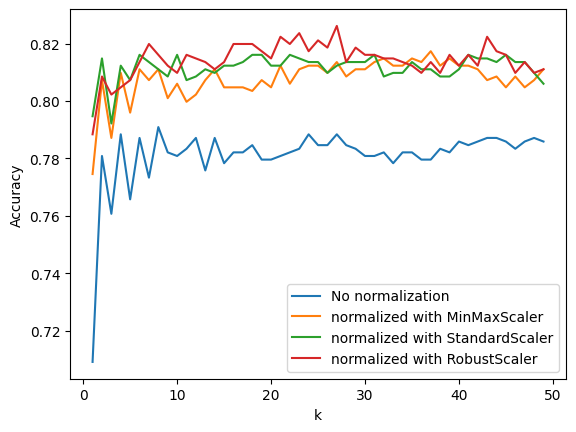

In [ ]:
k_values = range(1, 50)

class NoScaler:
    pass

ns = NoScaler()
ns.fit_transform = lambda x: x
ns.transform = lambda x: x

scalers = {
    'No normalization': ns,
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

best_ks = []
for scaler_name, scaler in scalers.items():
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    accuracies_normalized = []

    for i in k_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train_normalized, y_train)
        accuracies_normalized.append(model.score(X_test_normalized, y_test))

    plt.plot(k_values, accuracies_normalized, label=('normalized with ' if scaler_name != 'No normalization' else '') + scaler_name)

    best_accuracy = max(accuracies_normalized)
    best_k = k_values[accuracies_normalized.index(best_accuracy)]
    best_ks.append((scaler, best_k, best_accuracy))

best_scaler = None
best_k = 0
best_accuracy = 0

for scaler, k, accuracy in best_ks:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_scaler = scaler
        best_k = k

print("Best k value = " + str(best_k))

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
X_train = best_scaler.fit_transform(X_train)
X_test = best_scaler.transform(X_test)

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))

oversampler = SMOTE(k_neighbors=4, sampling_strategy=1)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_resampled, y_train_resampled)
y_pred = neigh.predict(X_test)

print("Classification report (after balancing):")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       629
           1       0.68      0.30      0.42       165

    accuracy                           0.83       794
   macro avg       0.76      0.63      0.66       794
weighted avg       0.81      0.83      0.80       794

Classification report (after balancing):
              precision    recall  f1-score   support

           0       0.95      0.67      0.78       629
           1       0.40      0.86      0.55       165

    accuracy                           0.71       794
   macro avg       0.68      0.76      0.67       794
weighted avg       0.84      0.71      0.74       794



## Naive Bayes

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_white.drop('quality', axis=1)
y = wine_white['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Define the grid of parameters to search (only var_smoothing in this case)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model and obtain accuracy
print("Classification report:")
print(classification_report(y_test, predictions))

# Normalize Data
scaler = RobustScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

grid_search.fit(X_train_normalized, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_normalized)

print("Classification report (after scaling):")
print(classification_report(y_test, predictions))

# Balance data
oversampler = SMOTE(k_neighbors=4)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Classification report (after balancing):")
print(classification_report(y_test, predictions))

Best Parameters: {'var_smoothing': 0.001}
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       768
           1       0.57      0.30      0.40       212

    accuracy                           0.80       980
   macro avg       0.70      0.62      0.64       980
weighted avg       0.77      0.80      0.78       980

Classification report (after scaling):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       768
           1       0.41      0.67      0.51       212

    accuracy                           0.72       980
   macro avg       0.65      0.70      0.65       980
weighted avg       0.79      0.72      0.74       980

Classification report (after balancing):
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       768
           1       0.35      0.77      0.48       212

    accuracy                         

In [ ]:
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

param_names = list(param_grid.keys())

for i, param_name in enumerate(param_names):
    param_values = [param[param_name] for param in params]

    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_test_scores, marker='o')
    plt.title(f'Accuracy vs {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.grid(True)
    plt.show()

## Logistic Regression

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_white.drop('quality', axis=1)
y = wine_white['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
# Without normalization
# Create and fit the model
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train, y_train)

# Making predictions on the test set
logisticRegression_pred = logisticRegression.predict(X_test)

# Evaluating the model
print("Classification report (raw data):")
print(classification_report(y_test, logisticRegression_pred))

Classification report (raw data):
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       768
           1       0.62      0.29      0.39       212

    accuracy                           0.81       980
   macro avg       0.73      0.62      0.64       980
weighted avg       0.78      0.81      0.78       980



In [ ]:
# List of scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize Logistic Regression models for different scalers
logisticRegression_models = {}

for scaler_name, scaler in scalers.items():
    # Normalizing features using each scaler
    X_train_normalized = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

    # Initializing and training the Logistic Regression model with normalized features
    logisticRegression = LogisticRegression(max_iter=1000)
    logisticRegression.fit(X_train_normalized, y_train)

    # Saving the trained model for each scaler
    logisticRegression_models[scaler_name] = logisticRegression

# Evaluate the models and print accuracy for each scaler
for scaler_name, model in logisticRegression_models.items():
    # Making predictions on the test set
    y_pred = model.predict(X_test_normalized)

    # Evaluating model
    print(f"Classification report (scaled with {scaler_name})):")
    print(classification_report(y_test, y_pred))

scaler = StandardScaler()
X_train_normalized = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

oversampler = SMOTE(k_neighbors=4)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_normalized, y_train)

logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train_oversampled, y_train_oversampled)

y_pred = logisticRegression.predict(X_test_normalized)
print("Classification report (after oversampling):")
print(classification_report(y_test, y_pred))

Classification report (scaled with MinMaxScaler)):
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       768
           1       0.42      0.59      0.49       212

    accuracy                           0.73       980
   macro avg       0.65      0.68      0.66       980
weighted avg       0.77      0.73      0.75       980

Classification report (scaled with StandardScaler)):
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       768
           1       0.74      0.15      0.25       212

    accuracy                           0.81       980
   macro avg       0.78      0.57      0.57       980
weighted avg       0.79      0.81      0.75       980

Classification report (scaled with RobustScaler)):
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       768
           1       0.58      0.27      0.37       212

    accuracy               

## Support Vector Machines

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_white.drop('quality', axis=1)
y = wine_white['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Classification report (raw data): ")
print(classification_report(y_test, y_pred))

Classification report (raw data): 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       768
           1       0.00      0.00      0.00       212

    accuracy                           0.78       980
   macro avg       0.39      0.50      0.44       980
weighted avg       0.61      0.78      0.69       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    #'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    # 'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC(class_weight='balanced')

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

best_svc = grid_search.best_estimator_

# Make predictions on the testing set
y_predict = best_svc.predict(X_test)

print("Classification report (after scaling):")
print(classification_report(y_test, y_predict))

oversampler = SMOTE(k_neighbors=4)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
best_svc.fit(X_train_oversampled, y_train_oversampled)
y_predict = best_svc.predict(X_test)

print("Classification report (after oversampling):")
print(classification_report(y_test, y_predict))

Best parameters: {'kernel': 'rbf'}
Classification report (after scaling):
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       768
           1       0.47      0.86      0.61       212

    accuracy                           0.76       980
   macro avg       0.71      0.80      0.72       980
weighted avg       0.85      0.76      0.78       980

Classification report (after oversampling):
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       768
           1       0.49      0.83      0.62       212

    accuracy                           0.78       980
   macro avg       0.72      0.80      0.73       980
weighted avg       0.84      0.78      0.79       980



## ANN

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_white.drop('quality', axis=1)
y = wine_white['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(len(X_train))
print(len(X_test))

3918
980


### Creating model

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Uncomment the following two lines to enable the oversampler
# oversampler = SMOTE(k_neighbors=4)
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

# from keras import backend as K
# K.set_value(model.optimizer.learning_rate, 0.0001)

model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model2 = Sequential()
# model2.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
# model2.add(Dense(12, activation='relu'))
# model2.add(Dense(1, activation='sigmoid'))
# model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model3 = Sequential()
# model3.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
# model3.add(Dense(12, activation='relu'))
# model3.add(Dense(12, activation='relu'))
# model3.add(Dense(1, activation='sigmoid'))
# model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model4 = Sequential()
# model4.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
# model4.add(Dense(12, activation='relu'))
# model4.add(Dense(12, activation='relu'))
# model4.add(Dense(12, activation='relu'))
# model4.add(Dense(1, activation='sigmoid'))
# model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Code to plot loss/accuracy
# history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=32)
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy (1 hidden layer)')
# plt.plot(history.history['accuracy'], label='Training Accuracy (1 hidden layer)')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

# history = model2.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=32)
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy (2 hidden layers)')
# plt.plot(history.history['accuracy'], label='Training Accuracy (2 hidden layer)')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

# history = model3.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=32)
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy (3 hidden layers)')
# plt.plot(history.history['accuracy'], label='Training Accuracy (3 hidden layers)')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

# history = model4.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=32)
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy (4 hidden layers)')
# plt.plot(history.history['accuracy'], label='Training Accuracy (4 hidden layers)')

# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in y_pred]

print("Classification report:")
print(classification_report(y_test, y_pred))

Epoch 1/100
123/123 [==============================] - 2s 4ms/step - loss: 0.6951 - accuracy: 0.6011
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7675
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7979
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8058
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8076
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8068
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8091
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8083
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8129
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3944 - accura

## Decision Trees

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_white.drop('quality', axis=1)
y = wine_white['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


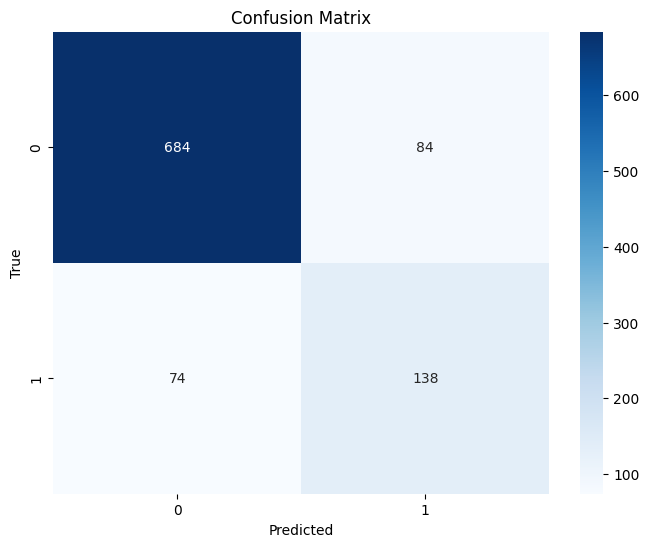

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       768
           1       0.62      0.65      0.64       212

    accuracy                           0.84       980
   macro avg       0.76      0.77      0.77       980
weighted avg       0.84      0.84      0.84       980



In [ ]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV to make predictions
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("Classification report: ")
print(classification_report(y_test, y_pred))

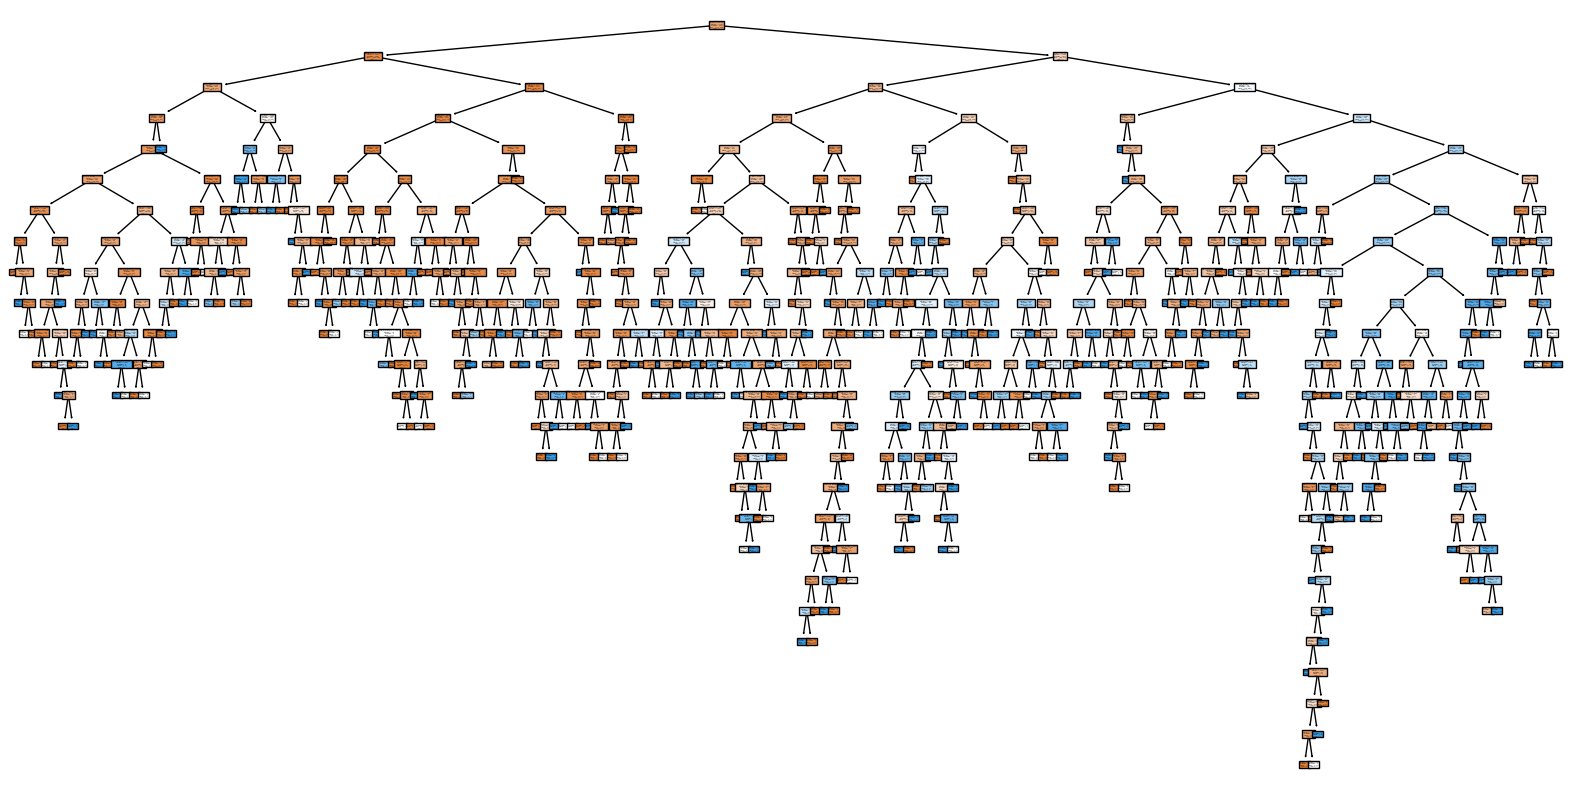

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
fn = X.columns.tolist()
cn = [str(c) for c in y.unique()]  # Convert class names to strings
plot_tree(best_dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [ ]:
# Apply SMOTE to balance classes
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the classifier
best_dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate the model
print("Classification report (after balancing): ")
print(classification_report(y_test, y_pred))

Classification report (after balancing): 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       768
           1       0.59      0.71      0.64       212

    accuracy                           0.83       980
   macro avg       0.75      0.79      0.76       980
weighted avg       0.84      0.83      0.83       980



## Random Forest

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_white.drop('quality', axis=1)
y = wine_white['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [5, 6, 7, 8, None],
    'criterion' :['gini', 'entropy']
}

clf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model and obtain accuracy
print("Classification report: ")
print(classification_report(y_test, predictions))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       768
           1       0.83      0.63      0.71       212

    accuracy                           0.89       980
   macro avg       0.86      0.80      0.82       980
weighted avg       0.89      0.89      0.89       980



In [ ]:
# Apply SMOTE to balance classes
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the classifier
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification report (after balancing): ")
print(classification_report(y_test, y_pred))

Classification report (after balancing): 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       768
           1       0.68      0.82      0.74       212

    accuracy                           0.88       980
   macro avg       0.81      0.85      0.83       980
weighted avg       0.89      0.88      0.88       980



## Visualizing the best classification

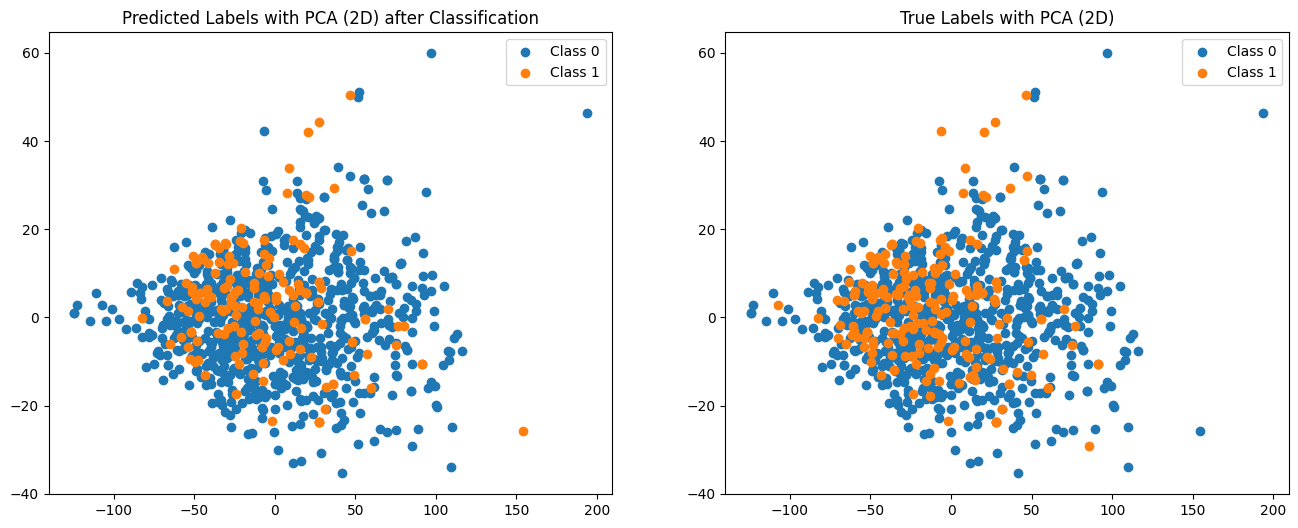

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for label in set(y_pred):
    indices = (y_pred == label)
    axes[0].scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=f'Class {label}')

axes[0].set_title('Predicted Labels with PCA (2D) after Classification')
axes[0].legend()

for label in set(y_test):
    indices = (y_test == label)
    axes[1].scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=f'Class {label}')

axes[1].set_title('True Labels with PCA (2D)')
axes[1].legend()

plt.show()

# Red Wine

## k-Nearest-Neighbors

### Train-test splitting

In [ ]:
wine_red_copy = pd.DataFrame(wine_red)
wine_red_copy.drop_duplicates(inplace=True)

# Divide features from target
X = wine_red_copy.drop('quality', axis=1)
y = wine_red_copy['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

Best k value = 2


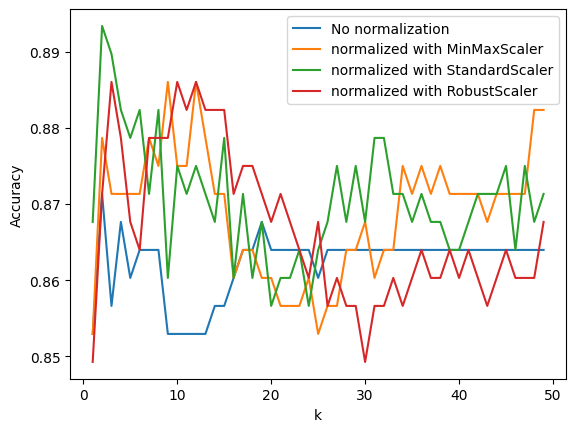

In [ ]:
k_values = range(1, 50)

class NoScaler:
    pass

ns = NoScaler()
ns.fit_transform = lambda x: x
ns.transform = lambda x: x

scalers = {
    'No normalization': ns,
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

best_ks = []
for scaler_name, scaler in scalers.items():
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    accuracies_normalized = []

    for i in k_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train_normalized, y_train)
        accuracies_normalized.append(model.score(X_test_normalized, y_test))

    plt.plot(k_values, accuracies_normalized, label=('normalized with ' if scaler_name != 'No normalization' else '') + scaler_name)

    best_accuracy = max(accuracies_normalized)
    best_k = k_values[accuracies_normalized.index(best_accuracy)]
    best_ks.append((scaler, best_k, best_accuracy))

best_scaler = None
best_k = 0
best_accuracy = 0

for scaler, k, accuracy in best_ks:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_scaler = scaler
        best_k = k

print("Best k value = " + str(best_k))

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
X_train = best_scaler.fit_transform(X_train)
X_test = best_scaler.transform(X_test)

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))

oversampler = SMOTE(k_neighbors=4, sampling_strategy=1)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_resampled, y_train_resampled)
y_pred = neigh.predict(X_test)

print("Classification report (after balancing):")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       235
           1       0.83      0.27      0.41        37

    accuracy                           0.89       272
   macro avg       0.86      0.63      0.67       272
weighted avg       0.89      0.89      0.87       272

Classification report (after balancing):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       235
           1       0.51      0.57      0.54        37

    accuracy                           0.87       272
   macro avg       0.72      0.74      0.73       272
weighted avg       0.87      0.87      0.87       272



## Naive Bayes

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Creating model

In [ ]:
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Define the grid of parameters to search (only var_smoothing in this case)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model and obtain accuracy
print("Classification report:")
print(classification_report(y_test, predictions))

# Normalize Data
scaler = RobustScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

grid_search.fit(X_train_normalized, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_normalized)

print("Classification report (after scaling):")
print(classification_report(y_test, predictions))

# Balance data
oversampler = SMOTE(k_neighbors=4)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Classification report (after balancing):")
print(classification_report(y_test, predictions))

Best Parameters: {'var_smoothing': 0.001}
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       415
           1       0.33      0.08      0.12        65

    accuracy                           0.85       480
   macro avg       0.60      0.53      0.52       480
weighted avg       0.80      0.85      0.81       480

Classification report (after scaling):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       415
           1       0.68      0.42      0.51        65

    accuracy                           0.89       480
   macro avg       0.79      0.69      0.73       480
weighted avg       0.88      0.89      0.88       480

Classification report (after balancing):
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       415
           1       0.33      0.74      0.45        65

    accuracy                         

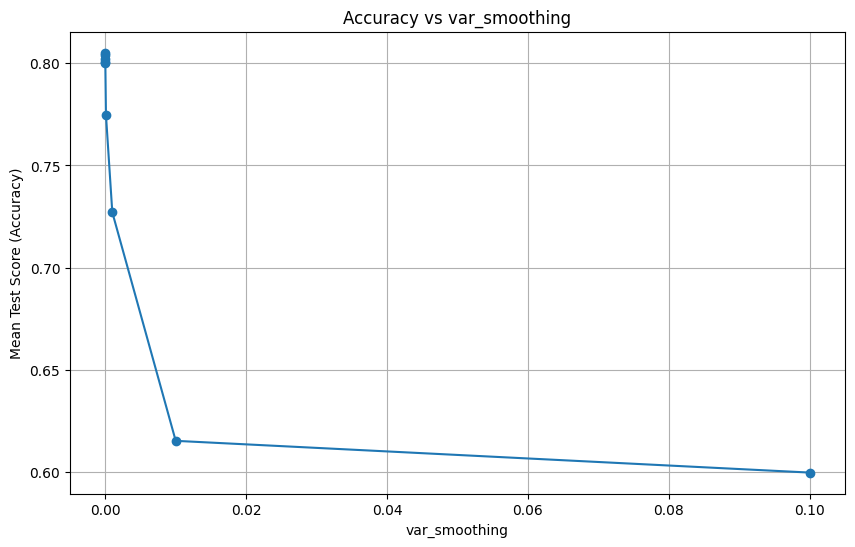

In [ ]:
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

param_names = list(param_grid.keys())

for i, param_name in enumerate(param_names):
    param_values = [param[param_name] for param in params]

    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_test_scores, marker='o')
    plt.title(f'Accuracy vs {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean Test Score (Accuracy)')
    plt.grid(True)
    plt.show()

## Logistic Regression

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
# Without normalization
# Create and fit the model
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train, y_train)

# Making predictions on the test set
logisticRegression_pred = logisticRegression.predict(X_test)

# Evaluating the model
print("Classification report (raw data):")
print(classification_report(y_test, logisticRegression_pred))

Classification report (raw data):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.74      0.33      0.45        43

    accuracy                           0.89       320
   macro avg       0.82      0.65      0.70       320
weighted avg       0.88      0.89      0.88       320



In [ ]:
# List of scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize Logistic Regression models for different scalers
logisticRegression_models = {}

for scaler_name, scaler in scalers.items():
    # Normalizing features using each scaler
    X_train_normalized = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

    # Initializing and training the Logistic Regression model with normalized features
    logisticRegression = LogisticRegression(max_iter=1000)
    logisticRegression.fit(X_train_normalized, y_train)

    # Saving the trained model for each scaler
    logisticRegression_models[scaler_name] = logisticRegression

# Evaluate the models and print accuracy for each scaler
for scaler_name, model in logisticRegression_models.items():
    # Making predictions on the test set
    y_pred = model.predict(X_test_normalized)

    # Evaluating model
    print(f"Classification report (scaled with {scaler_name})):")
    print(classification_report(y_test, y_pred))

scaler = RobustScaler()
X_train_normalized = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

oversampler = SMOTE(k_neighbors=4)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_normalized, y_train)

logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train_oversampled, y_train_oversampled)

y_pred = logisticRegression.predict(X_test_normalized)
print("Classification report (after oversampling):")
print(classification_report(y_test, y_pred))

Classification report (scaled with MinMaxScaler)):
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       277
           1       0.36      0.93      0.52        43

    accuracy                           0.77       320
   macro avg       0.67      0.84      0.68       320
weighted avg       0.90      0.77      0.80       320

Classification report (scaled with StandardScaler)):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       277
           1       0.65      0.26      0.37        43

    accuracy                           0.88       320
   macro avg       0.77      0.62      0.65       320
weighted avg       0.86      0.88      0.86       320

Classification report (scaled with RobustScaler)):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.68      0.35      0.46        43

    accuracy               

## Support Vector Machines

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Classification report (raw data): ")
print(classification_report(y_test, y_pred))

Classification report (raw data): 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       277
           1       0.00      0.00      0.00        43

    accuracy                           0.87       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.75      0.87      0.80       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    #'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    # 'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

best_svc = grid_search.best_estimator_

# Make predictions on the testing set
y_predict = best_svc.predict(X_test)

print("Classification report (after scaling):")
print(classification_report(y_test, y_predict))

oversampler = SMOTE(k_neighbors=4)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
svc = SVC(kernel='rbf')
svc.fit(X_train_oversampled, y_train_oversampled)
y_predict = svc.predict(X_test)

print("Classification report (after oversampling):")
print(classification_report(y_test, y_predict))

Best parameters: {'kernel': 'rbf'}
Classification report (after scaling):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.76      0.37      0.50        43

    accuracy                           0.90       320
   macro avg       0.84      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320

Classification report (after oversampling):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       277
           1       0.49      0.77      0.60        43

    accuracy                           0.86       320
   macro avg       0.73      0.82      0.76       320
weighted avg       0.90      0.86      0.87       320



## ANN

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Uncomment the following two lines to enable the oversampler
# oversampler = SMOTE(k_neighbors=4)
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

# Uncomment to change learning rate:
# from keras import backend as K
# K.set_value(model.optimizer.learning_rate, 0.0001)

model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in y_pred]

print("Classification report:")
print(classification_report(y_test, y_pred))

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.8585
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8624
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8616
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8632
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8640
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8718
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8749
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8749
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8765
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.8780
Epoch 11/

## Decision Trees

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


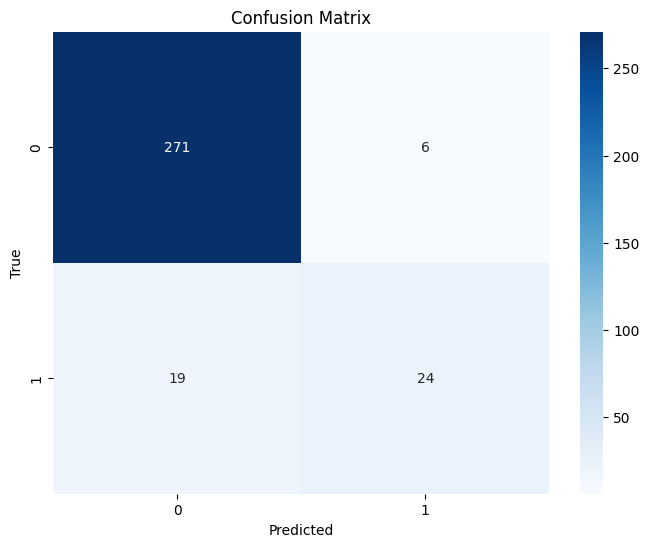

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       277
           1       0.80      0.56      0.66        43

    accuracy                           0.92       320
   macro avg       0.87      0.77      0.81       320
weighted avg       0.92      0.92      0.92       320



In [ ]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV to make predictions
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
print("Classification report: ")
print(classification_report(y_test, y_pred))

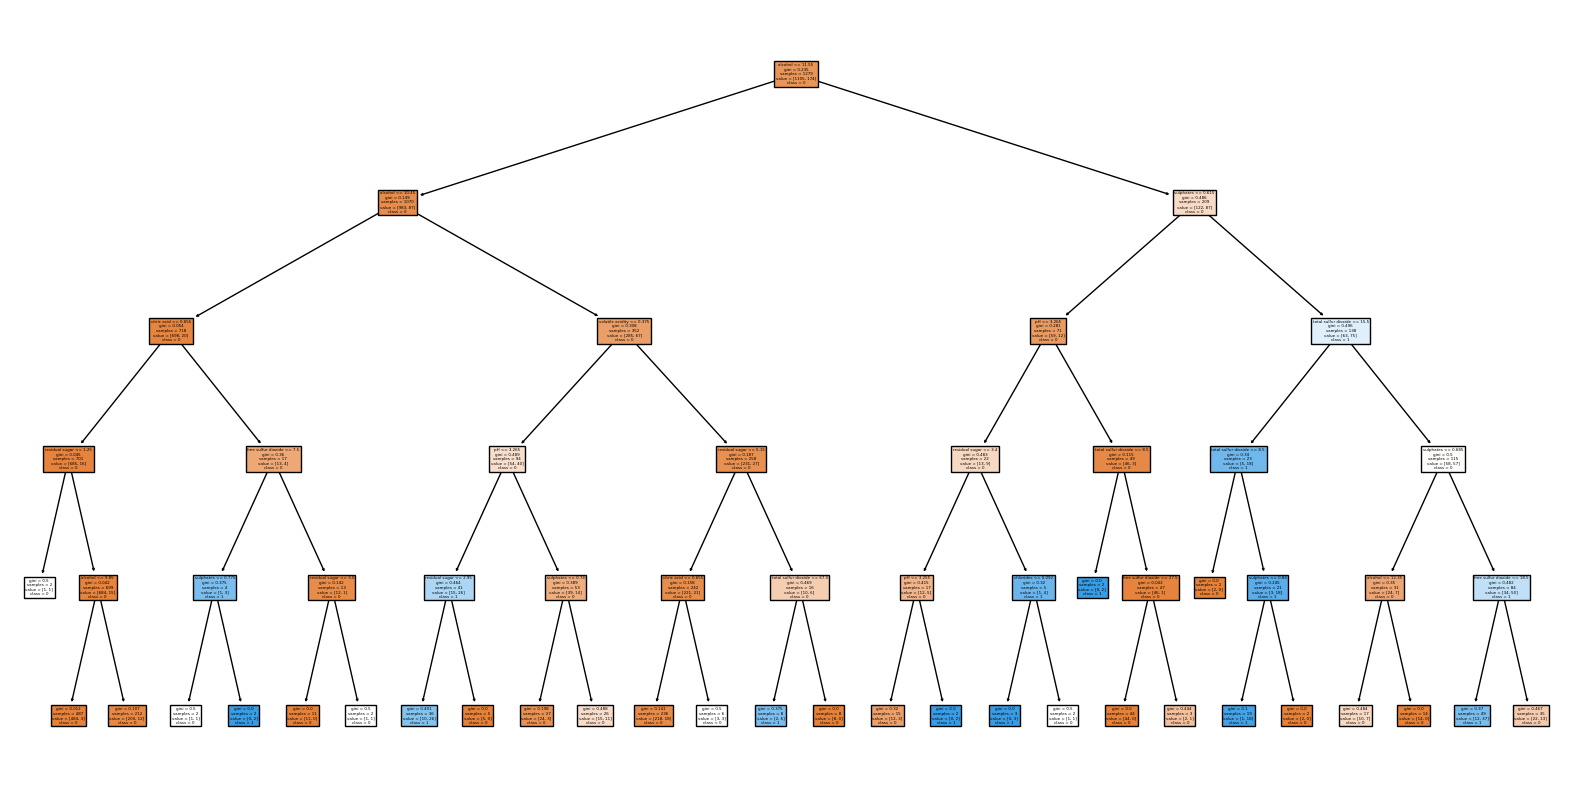

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
fn = X.columns.tolist()
cn = [str(c) for c in y.unique()]  # Convert class names to strings
plot_tree(best_dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [ ]:
# Apply SMOTE to balance classes
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the classifier
best_dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate the model
print("Classification report (after balancing): ")
print(classification_report(y_test, y_pred))

Classification report (after balancing): 
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       277
           1       0.40      0.72      0.52        43

    accuracy                           0.82       320
   macro avg       0.68      0.78      0.70       320
weighted avg       0.88      0.82      0.84       320



## Random Forest

### Train-test splitting

In [ ]:
# Divide features from target
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

# Take 20% for testing, stratify since dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Creating model

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [5, 6, 7, 8, None],
    'criterion' :['gini', 'entropy']
}

clf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model and obtain accuracy
print("Classification report: ")
print(classification_report(y_test, predictions))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.93      0.63      0.75        43

    accuracy                           0.94       320
   macro avg       0.94      0.81      0.86       320
weighted avg       0.94      0.94      0.94       320



In [ ]:
# Apply SMOTE to balance classes
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the classifier
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification report (after balancing): ")
print(classification_report(y_test, y_pred))

Classification report (after balancing): 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       277
           1       0.66      0.72      0.69        43

    accuracy                           0.91       320
   macro avg       0.81      0.83      0.82       320
weighted avg       0.92      0.91      0.91       320



## Visualizing the best classification

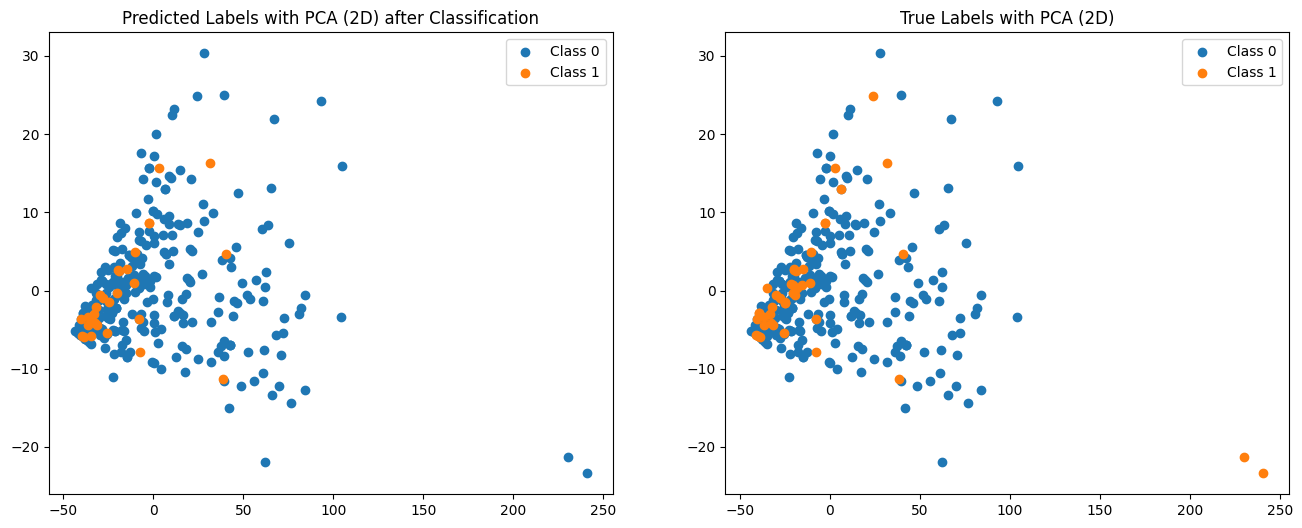

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for label in set(y_pred):
    indices = (y_pred == label)
    axes[0].scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=f'Class {label}')

axes[0].set_title('Predicted Labels with PCA (2D) after Classification')
axes[0].legend()

for label in set(y_test):
    indices = (y_test == label)
    axes[1].scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=f'Class {label}')

axes[1].set_title('True Labels with PCA (2D)')
axes[1].legend()

plt.show()